# plot the performance of ResNet on ccpd 

<Figure size 1600x500 with 0 Axes>

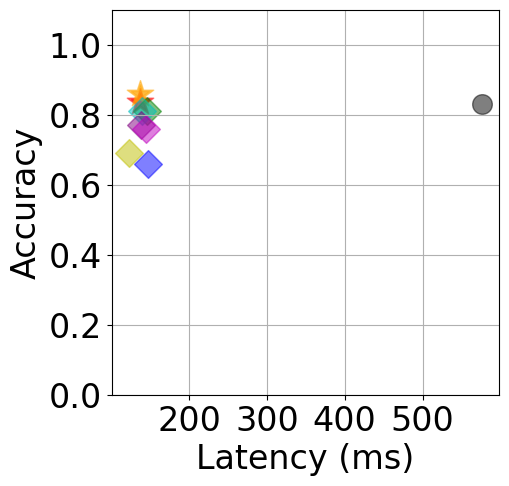

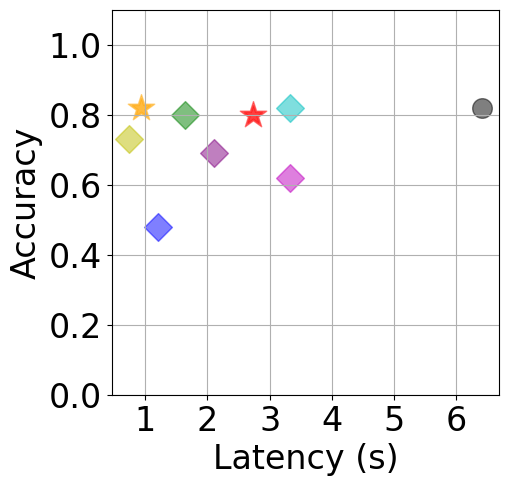

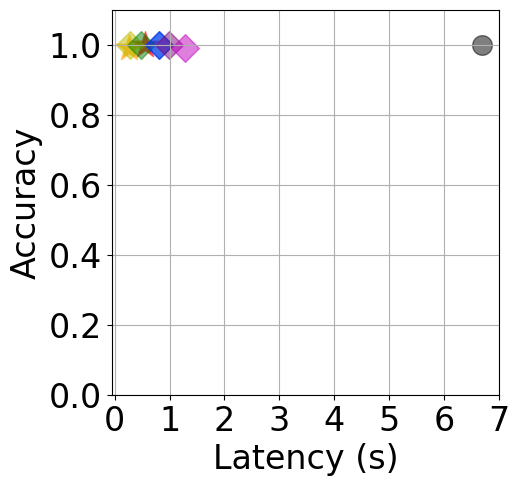

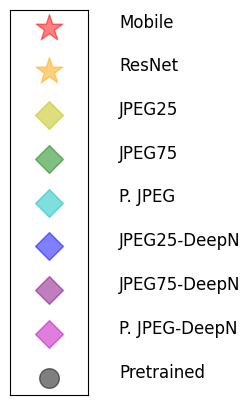

In [1]:
cifar_lat = [137, 137, 123, 146, 140, 147, 138, 144, 575.84]
imagenet_lat = [2736, 936, 744, 1636, 3321, 1203, 2113, 3329, 6403.17]
ccpd_lat = [554, 265, 287, 471, 816, 802, 991, 1273, 6686.47]

cifar_acc = [0.835, 0.86, 0.69, 0.81, 0.81, 0.66, 0.77 ,0.76, 0.83]
imagenet_acc = [0.8, 0.82, 0.73, 0.8, 0.82, 0.48, 0.69, 0.62, 0.82]
ccpd_acc = [1, 0.99, 1, 1, 1, 1, 1, 0.99, 1]

l = cifar_lat
a = cifar_acc
l2= [x/1000 for x in imagenet_lat]
a2= imagenet_acc
l3 = [x/1000 for x in ccpd_lat]
a3 = ccpd_acc

# plot 2d scatter plot
# use differnt color for different model
import matplotlib.pyplot as plt
# colors = ['b', 'orange', 'g', 'grey', 'c', 'm', 'y', 'k', 'w']
# shape = ['*', 'x', '^', 'D', 's', '+', 'v', '<', '>']
# raibow color
colors = ['r', 'orange', 'y', 'g', 'c', 'b', 'purple', 'm', 'black']
shape = ['*', '*', 'D', 'D', 'D', 'D', 'D', 'D', 'o']
labels = ['Mobile', 'ResNet', 'JPEG25', 'JPEG75', 'P. JPEG', 'JPEG25-DeepN', 'JPEG75-DeepN', 'P. JPEG-DeepN', 'Pretrained']

plt.figure(figsize=(16,5))
plt.figure(figsize=(5,5))
for i in range(len(colors)):
    if i < 2:
        plt.scatter(l[i], a[i], color=colors[i], marker=shape[i], label=labels[i], s=400, alpha=0.5)
    plt.scatter(l[i], a[i], color=colors[i], marker=shape[i], label=labels[i], s=200, alpha=0.5)
# plt.scatter(l[0], a[0], color=colors[3], marker='o', s=800, facecolors='none', edgecolors='r')
# plt.scatter(l[1], a[1], color=colors[3], marker='o', s=800, facecolors='none', edgecolors='r')
plt.xlabel('Latency (ms)', fontsize=24)
plt.ylabel('Accuracy', fontsize=24)
# plt.title('MobileNetV2 CIFAR-10')
plt.xticks(fontsize=24)
plt.ylim([0, 1.1])
plt.yticks(fontsize=24)
plt.grid()
plt.savefig('./Plots/cifar_acc_vs_lat.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(5,5))
for i in range(len(colors)):
    if i < 2:
        plt.scatter(l2[i], a2[i], color=colors[i], marker=shape[i], label=labels[i], s=400, alpha=0.5)
    plt.scatter(l2[i], a2[i], color=colors[i], marker=shape[i], label=labels[i], s=200, alpha=0.5)
# plot a larget circle around the point
# plt.scatter(l2[0], a2[0], color=colors[3], marker='o', s=800, facecolors='none', edgecolors='r')
# plt.scatter(l2[1], a2[1], color=colors[3], marker='o', s=800, facecolors='none', edgecolors='r')
plt.xlabel('Latency (s)', fontsize=24)
plt.ylabel('Accuracy', fontsize=24)
# plt.title('MobileNetV2 CIFAR-10')
plt.ylim([0, 1.1])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.savefig('./Plots/imagenet_acc_vs_lat.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize=(5,5))
for i in range(len(colors)):
    if i < 2:
        plt.scatter(l3[i], a3[i], color=colors[i], marker=shape[i], label=labels[i], s=400, alpha=0.5)
    plt.scatter(l3[i], a3[i], color=colors[i], marker=shape[i], label=labels[i], s=200, alpha=0.5)
# plot a larget circle around the point
# plt.scatter(l3[0], a3[0], color=colors[3], marker='o', s=800, facecolors='none', edgecolors='r')
# plt.scatter(l3[1], a3[1], color=colors[3], marker='o', s=800, facecolors='none', edgecolors='r')
plt.xlabel('Latency (s)', fontsize=24)
plt.ylabel('Accuracy', fontsize=24)
# plt.title('MobileNetV2 CIFAR-10')
plt.xticks(fontsize=24)
# plt.yticks([0.99, 1],fontsize=24)
plt.ylim([0, 1.1])
plt.yticks(fontsize=24)
plt.grid()
plt.savefig('./Plots/ccpd_acc_vs_lat.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize=(1,5))
# use text to show the model legend
for i in range(len(colors)):
    # plot marker
    if i < 2:
        plt.scatter(0, 1-i/len(colors), color=colors[i], marker=shape[i], s=400, alpha=0.5)
    else:
        plt.scatter(0, 1-i/len(colors), color=colors[i], marker=shape[i], s=200, alpha=0.5)
    plt.text(0.1, 1-i/len(colors), labels[i], fontsize=12)
# remove y ticks
plt.yticks([])
plt.xticks([])
plt.savefig('./Plots/acc_vs_lat_legend.pdf',bbox_inches='tight')


# New strategy to measure latency

In [2]:
# GF = gate frequency
GF_resnet_imagenet = {
    0.55:[int(x) for x in '1	599	0	0	0	0	0'.split()],
    0.65:[int(x) for x in '0	6	580	14	0	0	0'.split()],
    0.75:[int(x) for x in '0	6	539	55	0	0	0'.split()],
    0.85:[int(x) for x in '0	6	45	492	56	1	0'.split()],
    0.95:[int(x) for x in '0	6	36	431	111	1	15'.split()],
    0.99:[int(x) for x in '0	6	34	382	127	1	50'.split()],
}

GF_mobile_imagenet = {
    0.55:[int(x) for x in '600	0	0	0	0	0'.split()],
    0.65:[int(x) for x in '0	582	0	18	0	0'.split()],
    0.75:[int(x) for x in '0	55	0	544	1	0'.split()],
    0.85:[int(x) for x in '0	0	0	598	2	0'.split()],
    0.95:[int(x) for x in '0	0	0	596	3	1'.split()],
    0.99:[int(x) for x in '0	0	0	585	13	2'.split()],
}

GF_resnet_cifar = {
    0.55:[int(x) for x in '25	177	170	181	47	0	0'.split()],
    0.65:[int(x) for x in '4	33	129	180	254	0	0'.split()],
    0.75:[int(x) for x in '1	0	12	132	455	0	0'.split()],
    0.85:[int(x) for x in '0	0	0	13	587	0	0'.split()],
    0.95:[int(x) for x in '0	6	36	431	111	1	15'.split()],
    0.99:[int(x) for x in '0	0	0	0	49	93	458'.split()],
}

GF_mobile_cifar = {
    0.55:[int(x) for x in '600	0	0	0	0	0'.split()],
    0.65:[int(x) for x in '600	0	0	0	0	0'.split()],
    0.75:[int(x) for x in '445	155	0	0	0	0'.split()],
    0.85:[int(x) for x in '0	146	431	20	3	0'.split()],
    0.95:[int(x) for x in '0	0	0	0	28	572'.split()],
    0.99:[int(x) for x in '0	0	0	0	0	600'.split()],
}

GF_resnet_ccpd = {
    0.55:[int(x) for x in '600	0	0	0	0	0   0'.split()],
    0.65:[int(x) for x in '600	0	0	0	0	0   0'.split()],
    0.75:[int(x) for x in '600	0	0	0	0	0   0'.split()],
    0.85:[int(x) for x in '600	0	0	0	0	0   0'.split()],
    0.95:[int(x) for x in '600	0	0	0	0	0   0'.split()],
    0.99:[int(x) for x in '600	0	0	0	0	0   0'.split()],
}

GF_mobile_ccpd = {
    0.55:[int(x) for x in '600	0	0	0	0	0'.split()],
    0.65:[int(x) for x in '600	0	0	0	0	0'.split()],
    0.75:[int(x) for x in '600	0	0	0	0	0'.split()],
    0.85:[int(x) for x in '600	0	0	0	0	0'.split()],
    0.95:[int(x) for x in '600	0	0	0	0	0'.split()],
    0.99:[int(x) for x in '600	0	0	0	0	0'.split()],
}

In [3]:
GA_resnet_imagenet = {
    0.55:0.60,
    0.65:0.73,
    0.75:0.79,
    0.85:0.80,
    0.95:0.7967,
    0.99:0.7983
}

GA_mobile_imagenet = {
    0.55:0.5333,
    0.65:0.7167,
    0.75:0.7217,
    0.85:0.7867,
    0.95:0.79,
    0.99:0.79
}

GA_resnet_cifar = {
    0.55:0.67,
    0.65:0.79,
    0.75:0.84,
    0.85:0.87,
    0.95:0.87,
    0.99:0.88
}

GA_mobile_cifar = {
    0.55:0.72,
    0.65:0.72,
    0.75:0.74,
    0.85:0.84,
    0.95:0.83,
    0.99:0.83
}

GA_resnet_ccpd = {
    0.55:0.9967,
    0.65:0.9967,
    0.75:0.9967,
    0.85:0.9967,
    0.95:0.9967,
    0.99:0.9967
}

GA_mobile_ccpd = {
    0.55:0.995,
    0.65:0.995,
    0.75:0.995,
    0.85:0.995,
    0.95:0.995,
    0.99:0.995
}

OA_resnet_imagenet = 0.82
OA_mobile_imagenet = 0.79
OA_resnet_cifar = 0.8733
OA_mobile_cifar = 0.83
OA_resnet_ccpd = 0.9983
OA_mobile_ccpd = 0.9967



In [4]:
JA_resnet_imagenet = '0.60	0.70	0.73	0.77	0.78	0.78	0.79	0.80	0.81'.split()
JA_resnet_imagenet = {x:float(JA_resnet_imagenet[i]) for i, x in enumerate(range(10, 100, 10))}

JA_mobile_imagenet = '0.52	0.66	0.71	0.73	0.73	0.74	0.75	0.77	0.78'.split()
JA_mobile_imagenet = {x:float(JA_mobile_imagenet[i]) for i, x in enumerate(range(10, 100, 10))}

JA_resnet_cifar = [0.635, 0.7383, 0.7883, 0.8033, 0.8183, 0.815, 0.8333, 0.845, 0.8667]
JA_resnet_cifar = {x:float(JA_resnet_cifar[i]) for i, x in enumerate(range(10, 100, 10))}

JA_mobile_cifar = [0.5783, 0.68, 0.7167, 0.7467, 0.7717, 0.78, 0.7967, 0.8167, 0.8117]
JA_mobile_cifar = {x:float(JA_mobile_cifar[i]) for i, x in enumerate(range(10, 100, 10))}

JA_resnet_ccpd = [0.9967, 0.9983, 0.9983, 0.9983, 0.9983, 0.9983, 0.9983, 0.9983, 0.9983]
JA_resnet_ccpd = {x:float(JA_resnet_ccpd[i]) for i, x in enumerate(range(10, 100, 10))}

JA_mobile_ccpd = [0.9967, 0.9967, 0.9967, 0.9967, 0.9967, 0.9967, 0.9967, 0.9967, 0.9967]
JA_mobile_ccpd = {x:float(JA_mobile_ccpd[i]) for i, x in enumerate(range(10, 100, 10))}

In [5]:
GTL_resnet_cifar = {10:None, 100:None, 250:None, 500:None, 1000:None, 2000:None}
GTL_resnet_cifar_temp = '228.93	329.4420242	435.8465672	589.3177986	1255.963087	1998.145819	3703.728437'.split()
GTL_resnet_cifar[10] = GTL_resnet_cifar_temp
GTL_resnet_cifar_temp = '58.92	107.05	116.17	132.00	200.19	275.11	443.79'.split()
GTL_resnet_cifar[100] = GTL_resnet_cifar_temp
GTL_resnet_cifar_temp = '47.5926	93.12	95.01	101.08	129.45	160.68	227.42'.split()
GTL_resnet_cifar[250] = GTL_resnet_cifar_temp
GTL_resnet_cifar_temp = '43.838	87.32	88.60	93.49	103.88	125.26	152.64'.split()
GTL_resnet_cifar[500] = GTL_resnet_cifar_temp
GTL_resnet_cifar_temp = '41.9367	84.64	85.10	85.68	94.85	99.58	117.16'.split()
GTL_resnet_cifar[1000] = GTL_resnet_cifar_temp
GTL_resnet_cifar_temp = '40.9772	85.19	85.50	85.78	88.30	92.62	105.41'.split()
GTL_resnet_cifar[2000] = GTL_resnet_cifar_temp
# convert string to float
for key in GTL_resnet_cifar:
    GTL_resnet_cifar[key] = [float(x) for x in GTL_resnet_cifar[key]]

GTL_mobile_cifar = {10:None, 100:None, 250:None, 500:None, 1000:None, 2000:None}
GTL_mobile_cifar_temp = '443.2749748	759.0529	1304.183722	2148.725748	3530.845642	6002.437115'.split()
GTL_mobile_cifar[10] = GTL_mobile_cifar_temp
GTL_mobile_cifar_temp = '80.38	151.74	203.60	289.71	427.10	671.27'.split()
GTL_mobile_cifar[100] = GTL_mobile_cifar_temp
GTL_mobile_cifar_temp = '56.16	108.25	133.02	164.68	218.05	317.48'.split()
GTL_mobile_cifar[250] = GTL_mobile_cifar_temp
GTL_mobile_cifar_temp = '48.10	95.52	105.45	123.56	149.75	199.37'.split()
GTL_mobile_cifar[500] = GTL_mobile_cifar_temp
GTL_mobile_cifar_temp = '44.06	88.67	93.34	104.56	117.89	140.72'.split()
GTL_mobile_cifar[1000] = GTL_mobile_cifar_temp
GTL_mobile_cifar_temp = '42.07	85.80	87.67	93.16	99.89	117.33'.split()
GTL_mobile_cifar[2000] = GTL_mobile_cifar_temp
# convert string to float
for key in GTL_mobile_cifar:
    GTL_mobile_cifar[key] = [float(x) for x in GTL_mobile_cifar[key]]

In [6]:
GTL_resnet_imagenet = {10:None, 100:None, 250:None, 500:None, 1000:None, 2000:None}
GTL_resnet_imagenet_temp = '3474.67	6143.57	10747.94	21697.11	29536.48	59602.43	152758.91'.split()
GTL_resnet_imagenet[10] = GTL_resnet_imagenet_temp
GTL_resnet_imagenet_temp = '379.81	689.66	1149.66	2244.52	3026.45	5843.58	14460.47'.split()
GTL_resnet_imagenet[100] = GTL_resnet_imagenet_temp
GTL_resnet_imagenet_temp = '197.34	324.18	506.84	945.67	1260.53	2309.08	5784.62'.split()
GTL_resnet_imagenet[250] = GTL_resnet_imagenet_temp
GTL_resnet_imagenet_temp = '138.71	201.30	292.46	504.20	599.07	1186.43	3080.28'.split()
GTL_resnet_imagenet[500] = GTL_resnet_imagenet_temp
GTL_resnet_imagenet_temp = '108.93	143.92	194.15	297.62	315.14	599.21	1630.60'.split()
GTL_resnet_imagenet[1000] = GTL_resnet_imagenet_temp
GTL_resnet_imagenet_temp = '96.46	113.09	136.37	143.00	168.00	309.43	905.55'.split()
GTL_resnet_imagenet[2000] = GTL_resnet_imagenet_temp
# convert string to float
for key in GTL_resnet_imagenet:
    GTL_resnet_imagenet[key] = [float(x) for x in GTL_resnet_imagenet[key]]

GTL_mobile_imagenet = {10:None, 100:None, 250:None, 500:None, 1000:None, 2000:None}
GTL_mobile_imagenet_temp = '11854.72822	23405.98893	50285.02893	71646.95883	121401.2792	229763.057'.split()
GTL_mobile_imagenet[10] = GTL_mobile_imagenet_temp
GTL_mobile_imagenet_temp = '1221.615553	2372.134209	4816.518307	7339.42318	12412.43577	15889.62674'.split()
GTL_mobile_imagenet[100] = GTL_mobile_imagenet_temp
GTL_mobile_imagenet_temp = '512.717247	998.0823994	1918.471575	2922.615051	4990.419865	6465.837479'.split()
GTL_mobile_imagenet[250] = GTL_mobile_imagenet_temp
GTL_mobile_imagenet_temp = '270.8568573	487.1263504	933.6321354	1458.305597	2508.303165	3824.08'.split()
GTL_mobile_imagenet[500] = GTL_mobile_imagenet_temp
GTL_mobile_imagenet_temp = '158.267498	310.6443882	479.7046185	778.4941196	1353.166103	1751.685381'.split()
GTL_mobile_imagenet[1000] = GTL_mobile_imagenet_temp
GTL_mobile_imagenet_temp = '99.16090965	196.5947151	245.6581593	418.0421829	747.2906113	966.1622047'.split()
GTL_mobile_imagenet[2000] = GTL_mobile_imagenet_temp
# convert string to float
for key in GTL_mobile_imagenet:
    GTL_mobile_imagenet[key] = [float(x) for x in GTL_mobile_imagenet[key]]

In [7]:
GTL_resnet_ccpd = {10:None, 100:None, 250:None, 500:None, 1000:None, 2000:None}
GTL_resnet_ccpd_temp = '12251.23    5600.09    8428.59    16513.59   32028.97   60845.23   117594.64'.split()
GTL_resnet_ccpd[10] = GTL_resnet_ccpd_temp
GTL_resnet_ccpd_temp ='405.39    633.69  915.35  1726.04    3225.27    6011.57    11690.78'.split()
GTL_resnet_ccpd[100] = GTL_resnet_ccpd_temp
GTL_resnet_ccpd_temp ='209.42    302.19  416.67  738.08  1300.02    2410.97    4680.36'.split()
GTL_resnet_ccpd[250] = GTL_resnet_ccpd_temp
GTL_resnet_ccpd_temp ='142.98    194.99  250.86  411.88  660.08  1216.57    2347.11'.split()
GTL_resnet_ccpd[500] = GTL_resnet_ccpd_temp
GTL_resnet_ccpd_temp ='115.27    136.23  164.35  244.70  340.45  617.93  1185.58'.split()
GTL_resnet_ccpd[1000] = GTL_resnet_ccpd_temp
GTL_resnet_ccpd_temp ='96.45 112.96  123.05  165.38  242.63  318.66  580.87'.split()
GTL_resnet_ccpd[2000] = GTL_resnet_ccpd_temp
# convert string to float
print(GTL_resnet_ccpd)
for key in GTL_resnet_ccpd:
    GTL_resnet_ccpd[key] = [float(x) for x in GTL_resnet_ccpd[key]]

GTL_mobile_ccpd = {10:None, 100:None, 250:None, 500:None, 1000:None, 2000:None}
GTL_mobile_ccpd_temp = '10552.10    18707.68   27064.08   57150.70   161021.66  235137.80'.split()
GTL_mobile_ccpd[10] = GTL_mobile_ccpd_temp
GTL_mobile_ccpd_temp ='1069.58  1945.58    2715.58    5465.30    11243.12   22287.46'.split()
GTL_mobile_ccpd[100] = GTL_mobile_ccpd_temp
GTL_mobile_ccpd_temp ='452.13    828.18  1082.57    2199.26    4510.48    9062.58'.split()
GTL_mobile_ccpd[250] = GTL_mobile_ccpd_temp
GTL_mobile_ccpd_temp ='245.97    454.20  541.31  1116.14    2305.51    4660.95'.split()
GTL_mobile_ccpd[500] = GTL_mobile_ccpd_temp
GTL_mobile_ccpd_temp ='143.06    266.38  270.66  563.11  1202.66    2462.11'.split()
GTL_mobile_ccpd[1000] = GTL_mobile_ccpd_temp
GTL_mobile_ccpd_temp ='91.58 173.88  139.29  291.59  652.42  1202.64'.split()
GTL_mobile_ccpd[2000] = GTL_mobile_ccpd_temp
# convert string to float
for key in GTL_mobile_ccpd:
    GTL_mobile_ccpd[key] = [float(x) for x in GTL_mobile_ccpd[key]]

{10: ['12251.23', '5600.09', '8428.59', '16513.59', '32028.97', '60845.23', '117594.64'], 100: ['405.39', '633.69', '915.35', '1726.04', '3225.27', '6011.57', '11690.78'], 250: ['209.42', '302.19', '416.67', '738.08', '1300.02', '2410.97', '4680.36'], 500: ['142.98', '194.99', '250.86', '411.88', '660.08', '1216.57', '2347.11'], 1000: ['115.27', '136.23', '164.35', '244.70', '340.45', '617.93', '1185.58'], 2000: ['96.45', '112.96', '123.05', '165.38', '242.63', '318.66', '580.87']}


In [8]:
JL_imagenet = {10:None, 100:None, 250:None, 500:None, 1000:None, 2000:None}
JL_imagenet_temp = '3386.25  5536.27 6419.87 7540.66 8725.95 10052.43    12131.43    15420.8 22222.75    51887.91'.split()
JL_imagenet[10] = JL_imagenet_temp
JL_imagenet_temp = '368.36   667.85  769.91  883.07  1002.12 1135.86 1343.37 1684.4  2352.09 5244.91'.split()
JL_imagenet[100] = JL_imagenet_temp
JL_imagenet_temp = '170.82   341.95  395.49  440.38  486.64  540.52  626.57  754.96  1548.83 2135.51'.split()
JL_imagenet[250] = JL_imagenet_temp
JL_imagenet_temp = '106.47   242.22  273.72  297.4   315.16  342.12  385.28  448.8   587.73  1098.7'.split()
JL_imagenet[500] = JL_imagenet_temp
JL_imagenet_temp = '73.17    193.13  208.35  218.41  231.41  244.71  268.33  296.42  363.7   593.99'.split()
JL_imagenet[1000] = JL_imagenet_temp
JL_imagenet_temp = '51.89    174.12  173.96  181.09  185.46  194.4   205.54  223.82  253.58  341.17'.split()
JL_imagenet[2000] = JL_imagenet_temp
# convert string to float
for key in JL_imagenet:
    JL_imagenet[key] = [float(x) for x in JL_imagenet[key]]

JL_cifar = {10:None, 100:None, 250:None, 500:None, 1000:None, 2000:None}
JL_cifar_temp = '951.06	1255.93	1261.85	1293.89	1330.14	1362.78	1421.14	1493.75	1683.23	3933.2'.split()
JL_cifar[10] = JL_cifar_temp
JL_cifar_temp = '126.53	250.66	255.31	258.61	262.89	263.06	269.07	278.48	294.67	382.63'.split()
JL_cifar[100] = JL_cifar_temp
JL_cifar_temp = '71.53	185.45	188.89	188.67	188.79	192.87	194	197.86	207.05	238.2'.split()
JL_cifar[250] = JL_cifar_temp
JL_cifar_temp = '61.44	163.46	168.69	164.08	168.01	168.06	168.57	168.9	171.44	188.54'.split()
JL_cifar[500] = JL_cifar_temp
JL_cifar_temp = '45.55	152.6	155.9	155.68	155.9	155.79	156.19	155.91	157.42	168.09'.split()
JL_cifar[1000] = JL_cifar_temp
JL_cifar_temp = '41.24	145.87	147.82	147.47	151.81	147.53	147.72	147.74	148.38	155.77'.split()
JL_cifar[2000] = JL_cifar_temp
# convert string to float
for key in JL_cifar:
    JL_cifar[key] = [float(x) for x in JL_cifar[key]]

JL_ccpd = {10:None, 100:None, 250:None, 500:None, 1000:None, 2000:None}
JL_ccpd_temp = '4107.19	6337.94	6877.73	7737.19	8560.79	11458.59	10666.15	12673.58	17123.52	42419.26'.split()
JL_ccpd[10] = JL_ccpd_temp
JL_ccpd_temp = '438.72	714	815.96	905.18	985.93	1070.63	1191.56	1395.43	1840.12	4264.18'.split()
JL_ccpd[100] = JL_ccpd_temp
JL_ccpd_temp = '196.52	369.72	413.26	445.63	480.42	512.8	565.01	649.38	821.05	1742.84'.split()
JL_ccpd[250] = JL_ccpd_temp
JL_ccpd_temp = '118.94	257.4	276.65	296.71	312.08	332.12	356.37	396.28	484.56	902.55'.split()
JL_ccpd[500] = JL_ccpd_temp
JL_ccpd_temp = '78.71	198.69	210.07	220.05	227.8	235.74	247.81	267.78	311.92	483.17'.split()
JL_ccpd[1000] = JL_ccpd_temp
JL_ccpd_temp = '60.56	171.96	176.41	183.68	187.55	195.67	197.72	205.71	229.81	292.56'.split()
JL_ccpd[2000] = JL_ccpd_temp
# convert string to float
for key in JL_ccpd:
    JL_ccpd[key] = [float(x) for x in JL_ccpd[key]]

In [9]:
GL_mobile_imagenet = '30.63201904	44.51012611	56.26797676	83.30321312	152.9676914	127.3810863'.split()
GL_resnet_imagenet = '11.03568077	15.82241058	22.98498154	32.6757431	58.37106705	100.4645824	73.60243797'.split()
GL_mobile_cifar = '2.37	2.31	2.78	2.98	5.34	4.49'.split()
GL_resnet_cifar = '2.25	1.74	2.16	2.88	3.71	3.95	3.84'.split()
GL_mobile_ccpd = '32.68694878	49.61109161	98.43826294	149.1699219	222.9745388	363.4338379'.split()
GL_resnet_ccpd = '11.05356216	15.73681831	28.1598568	42.63234138	75.99401474	124.7019768	113.5435104'.split()
# convert string to float
GL_mobile_imagenet = [float(x) for x in GL_mobile_imagenet]
GL_resnet_imagenet = [float(x) for x in GL_resnet_imagenet]
GL_mobile_cifar = [float(x) for x in GL_mobile_cifar]
GL_resnet_cifar = [float(x) for x in GL_resnet_cifar]
GL_mobile_ccpd = [float(x) for x in GL_mobile_ccpd]
GL_resnet_ccpd = [float(x) for x in GL_resnet_ccpd]

In [10]:
GCL_mobile_imagenet = 5.89
GCL_resnet_imagenet = 21.16
GCL_mobile_cifar = 0.33
GCL_resnet_cifar = 0.70
GCL_mobile_ccpd = 6.44
GCL_resnet_ccpd = 21.60

In [11]:
OCL_mobile_imagenet = 324.00
OCL_resnet_imagenet = 459.13
OCL_mobile_cifar = 19.25
OCL_resnet_cifar = 78.20
OCL_mobile_ccpd = 135.74
OCL_resnet_ccpd = 487.64

In [12]:
# GFs = {('mobile','imagenet'): GF_mobile_imagenet, ('resnet','imagenet'): GF_resnet_imagenet, ('mobile','cifar'): GF_mobile_cifar, ('resnet','cifar'): GF_resnet_cifar, ('mobile','ccpd'): GF_mobile_ccpd, ('resnet','ccpd'): GF_resnet_ccpd}
# GAs = {('mobile','imagenet'): GA_mobile_imagenet, ('resnet','imagenet'): GA_resnet_imagenet, ('mobile','cifar'): GA_mobile_cifar, ('resnet','cifar'): GA_resnet_cifar, ('mobile','ccpd'): GA_mobile_ccpd, ('resnet','ccpd'): GA_resnet_ccpd}
# OAs = {('mobile','imagenet'): OA_mobile_imagenet, ('resnet','imagenet'): OA_resnet_imagenet, ('mobile','cifar'): OA_mobile_cifar, ('resnet','cifar'): OA_resnet_cifar, ('mobile','ccpd'): OA_mobile_ccpd, ('resnet','ccpd'): OA_resnet_ccpd}
# JAs = {('mobile','imagenet'): JA_mobile_imagenet, ('resnet','imagenet'): JA_resnet_imagenet, ('mobile','cifar'): JA_mobile_cifar, ('resnet','cifar'): JA_resnet_cifar, ('mobile','ccpd'): JA_mobile_ccpd, ('resnet','ccpd'): JA_resnet_ccpd}
# GTLs = {('mobile','imagenet'): GTL_mobile_imagenet, ('resnet','imagenet'): GTL_resnet_imagenet, ('mobile','cifar'): GTL_mobile_cifar, ('resnet','cifar'): GTL_resnet_cifar, ('mobile','ccpd'): GTL_mobile_ccpd, ('resnet','ccpd'): GTL_resnet_ccpd}
# JLs = {('imagenet'): JL_imagenet, ('cifar'): JL_cifar, ('ccpd'): JL_ccpd}
# GLs = {('mobile','imagenet'): GL_mobile_imagenet, ('resnet','imagenet'): GL_resnet_imagenet, ('mobile','cifar'): GL_mobile_cifar, ('resnet','cifar'): GL_resnet_cifar, ('mobile','ccpd'): GL_mobile_ccpd, ('resnet','ccpd'): GL_resnet_ccpd}
# GCLs = {('mobile','imagenet'): GCL_mobile_imagenet, ('resnet','imagenet'): GCL_resnet_imagenet, ('mobile','cifar'): GCL_mobile_cifar, ('resnet','cifar'): GCL_resnet_cifar, ('mobile','ccpd'): GCL_mobile_ccpd, ('resnet','ccpd'): GCL_resnet_ccpd}
# OCLs = {('mobile','imagenet'): OCL_mobile_imagenet, ('resnet','imagenet'): OCL_resnet_imagenet, ('mobile','cifar'): OCL_mobile_cifar, ('resnet','cifar'): OCL_resnet_cifar, ('mobile','ccpd'): OCL_mobile_ccpd, ('resnet','ccpd'): OCL_resnet_ccpd}
# default_server_latency = 4
GFs = {('mobile','imagenet'): GF_mobile_imagenet, ('resnet','imagenet'): GF_resnet_imagenet, ('mobile','cifar'): GF_mobile_cifar, ('resnet','cifar'): GF_resnet_cifar}
GAs = {('mobile','imagenet'): GA_mobile_imagenet, ('resnet','imagenet'): GA_resnet_imagenet, ('mobile','cifar'): GA_mobile_cifar, ('resnet','cifar'): GA_resnet_cifar}
OAs = {('mobile','imagenet'): OA_mobile_imagenet, ('resnet','imagenet'): OA_resnet_imagenet, ('mobile','cifar'): OA_mobile_cifar, ('resnet','cifar'): OA_resnet_cifar}
JAs = {('mobile','imagenet'): JA_mobile_imagenet, ('resnet','imagenet'): JA_resnet_imagenet, ('mobile','cifar'): JA_mobile_cifar, ('resnet','cifar'): JA_resnet_cifar}
GTLs = {('mobile','imagenet'): GTL_mobile_imagenet, ('resnet','imagenet'): GTL_resnet_imagenet, ('mobile','cifar'): GTL_mobile_cifar, ('resnet','cifar'): GTL_resnet_cifar}
JLs = {('imagenet'): JL_imagenet, ('cifar'): JL_cifar}
GLs = {('mobile','imagenet'): GL_mobile_imagenet, ('resnet','imagenet'): GL_resnet_imagenet, ('mobile','cifar'): GL_mobile_cifar, ('resnet','cifar'): GL_resnet_cifar}
GCLs = {('mobile','imagenet'): GCL_mobile_imagenet, ('resnet','imagenet'): GCL_resnet_imagenet, ('mobile','cifar'): GCL_mobile_cifar, ('resnet','cifar'): GCL_resnet_cifar}
OCLs = {('mobile','imagenet'): OCL_mobile_imagenet, ('resnet','imagenet'): OCL_resnet_imagenet, ('mobile','cifar'): OCL_mobile_cifar, ('resnet','cifar'): OCL_resnet_cifar}
default_server_latency = 4


In [13]:
# convert them to arracy
import numpy as np
JLs_np = {k:np.array(list(JLs[k].values()), dtype = np.float32) for k in JLs}
GTLs_np = {k:np.array([GTLs[k][x] for x in sorted(GTLs[k].keys())], dtype = np.float32) for k in GTLs}
JAs_np = {k:np.array(list(JAs[k].values()), dtype = np.float32) for k in JAs}
GFs_np = {k:np.array([GFs[k][x] for x in sorted(GFs[k].keys())], dtype = np.float32) for k in GFs}
GAs_np = {k:np.array([GAs[k][x] for x in sorted(GAs[k].keys())], dtype = np.float32) for k in GAs}    
OAs_np = {k:np.array([OAs[k]], dtype = np.float32) for k in OAs}
GLs_np = {k:np.array(GLs[k], dtype = np.float32) for k in GLs}
GCLs_np = {k:np.array([GCLs[k]], dtype = np.float32) for k in GCLs}
OCLs_np = {k:np.array([OCLs[k]], dtype = np.float32) for k in OCLs}

In [14]:
# anomaly detection
def anomaly_detection(mat):
    keys = list(mat.keys())
    for k in keys:
        shape = mat[k].shape
        if len(shape) == 1:
            for i in range(1, len(mat[k])):
                if mat[k][i] < mat[k][i-1]:
                    print(f'{k} has anomaly at {i}')
        else:
            for i in range(shape[1]):
                for j in range(1, shape[0]):
                    if mat[k][j][i] > mat[k][j-1][i]:
                        print(f'{k} has anomaly at {j} {i}')
            for i in range(shape[0]):
                for j in range(1, shape[1]):
                    if mat[k][i][j] < mat[k][i][j-1]:
                        print(f'{k} has anomaly at {i} {j}')

anomaly_detection(JLs_np)
print('---------------------')
anomaly_detection(GTLs_np)
print('---------------------')
anomaly_detection(GLs_np)
print('---------------------')
anomaly_detection(GCLs_np)
print('---------------------')
anomaly_detection(OCLs_np)

imagenet has anomaly at 5 2
cifar has anomaly at 2 3
cifar has anomaly at 3 3
cifar has anomaly at 4 3
cifar has anomaly at 4 5
cifar has anomaly at 4 7
cifar has anomaly at 5 3
cifar has anomaly at 5 5
---------------------
('resnet', 'cifar') has anomaly at 5 1
('resnet', 'cifar') has anomaly at 5 2
('resnet', 'cifar') has anomaly at 5 3
---------------------
('mobile', 'imagenet') has anomaly at 5
('resnet', 'imagenet') has anomaly at 6
('mobile', 'cifar') has anomaly at 1
('mobile', 'cifar') has anomaly at 5
('resnet', 'cifar') has anomaly at 1
('resnet', 'cifar') has anomaly at 6
---------------------
---------------------


In [15]:
network_conditions = [10, 100, 250, 500, 1000, 2000]
models = ['mobile', 'resnet']
datasets = ['imagenet', 'cifar']

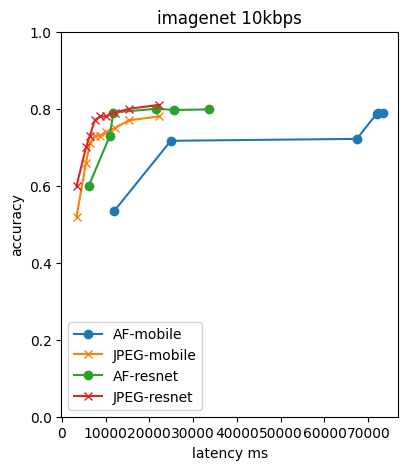

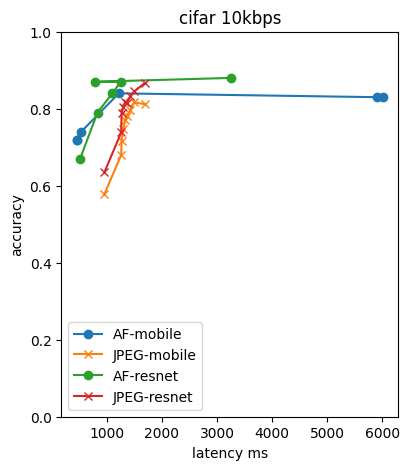

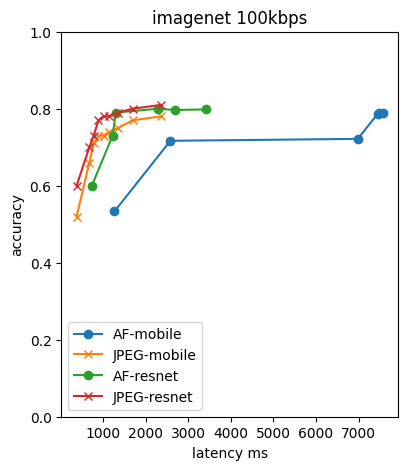

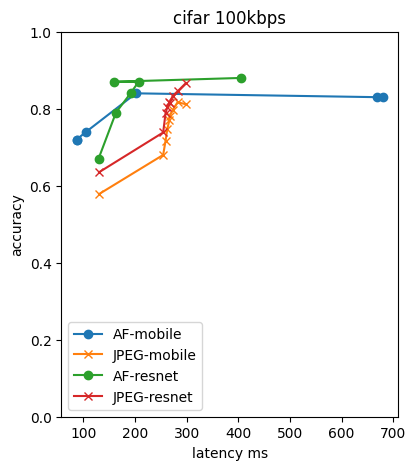

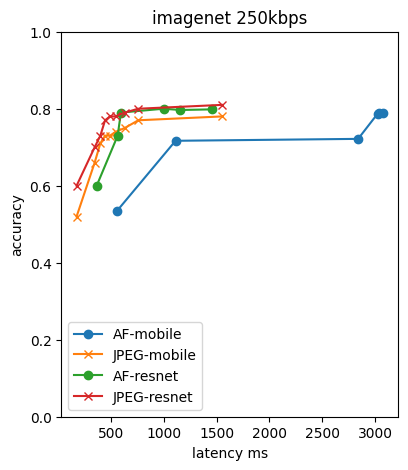

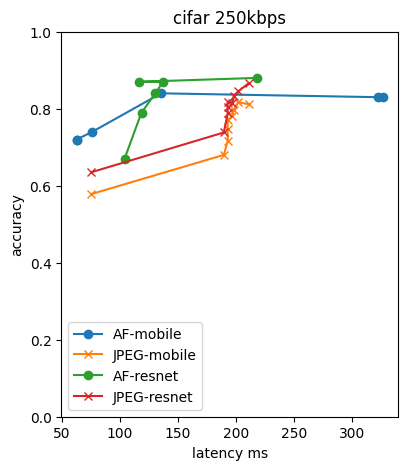

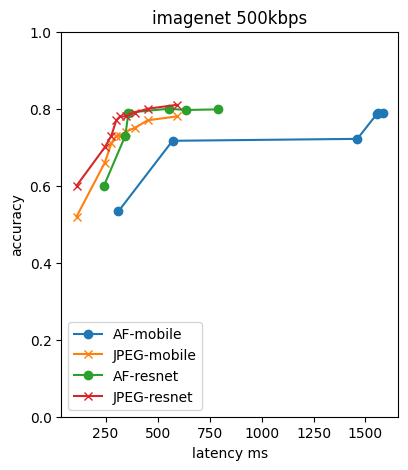

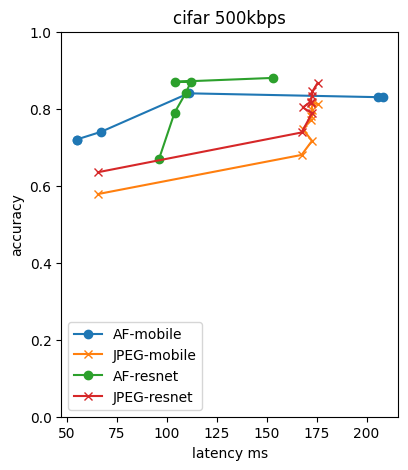

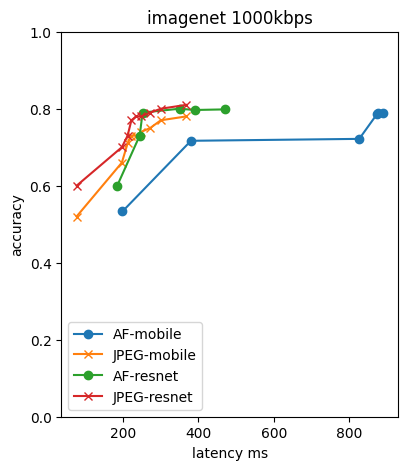

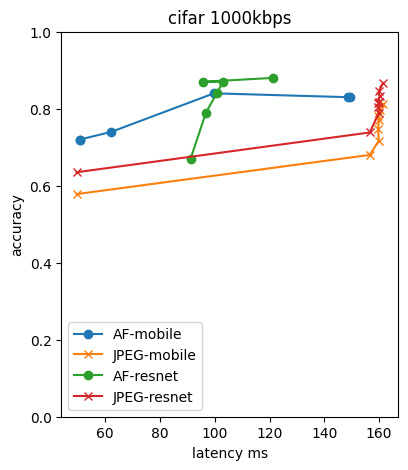

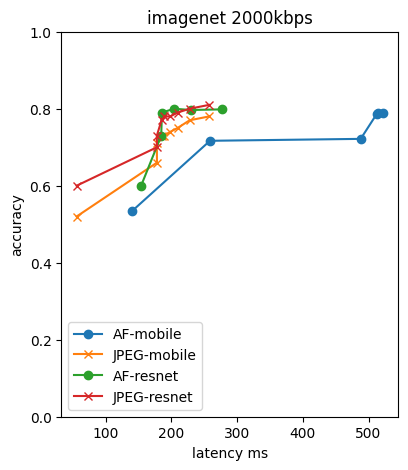

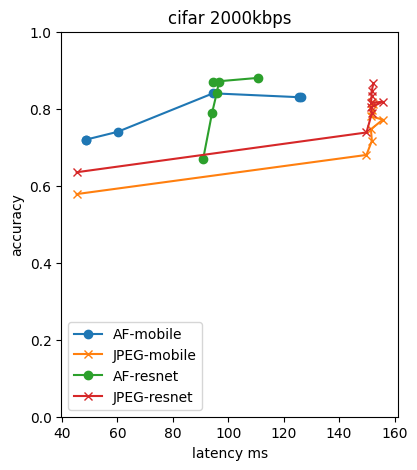

In [16]:
# plot the accuracy vs latency for different network conditions
import matplotlib.pyplot as plt
import numpy as np
data_points = 600
for ind, nc in enumerate(network_conditions):
    for d in datasets:
        # subfigure 1*4
        plt.figure(figsize=(20,5))
        plt.subplot(1,4,1)
        plt.title(d+ ' '+ str(nc)+'kbps')
        plt.xlabel('latency ms')
        plt.ylabel('accuracy')
        plt.ylim(0,1)
        for m in models:
            # client_latency = GCL+ GL*GF + GTL*GF + Default_server_latency
            AF_latency = float(GCLs[(m,d)]) + \
                        np.dot(GLs_np[(m,d)] , GFs_np[(m,d)].transpose())/data_points + \
                        np.dot(GTLs_np[(m,d)][ind] , GFs_np[(m,d)].transpose())/data_points + \
                        float(default_server_latency)
            AF_accuracy = GAs_np[(m,d)]
            plt.plot(AF_latency, AF_accuracy, 'o-', label='AF-'+m)
        # JPEG latency = JL + Default_server_latency
            J_latency = np.array(JLs_np[d][ind]) + default_server_latency
            J_latency = J_latency[:-1]
            J_accuracy = JAs_np[(m,d)]
            plt.plot(J_latency, J_accuracy, 'x-', label='JPEG-'+m)
        plt.legend()
        